In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv
import seaborn as sns
from scipy.io import arff
import numpy.random as nr
import math


In [243]:
data = []
with open('chronic_kidney_disease.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[29:429], columns=names)

In [244]:
data

[['@relation Chronic_Kidney_Disease'],
 [''],
 ["@attribute 'age' numeric"],
 ["@attribute 'bp'  numeric"],
 ["@attribute 'sg' {1.005", '1.010', '1.015', '1.020', '1.025}'],
 ["@attribute 'al' {0", '1', '2', '3', '4', '5}  '],
 ["@attribute 'su' {0", '1', '2', '3', '4', '5}  '],
 ["@attribute 'rbc' {normal", 'abnormal}'],
 ["@attribute 'pc' {normal", 'abnormal} '],
 ["@attribute 'pcc' {present", 'notpresent}'],
 ["@attribute 'ba' {present", 'notpresent}'],
 ["@attribute 'bgr'  numeric"],
 ["@attribute 'bu' numeric"],
 ["@attribute 'sc' numeric"],
 ["@attribute 'sod' numeric"],
 ["@attribute 'pot' numeric"],
 ["@attribute 'hemo' numeric"],
 ["@attribute 'pcv' numeric"],
 ["@attribute 'wbcc' numeric"],
 ["@attribute 'rbcc' numeric"],
 ["@attribute 'htn' {yes", 'no}'],
 ["@attribute 'dm' {yes", 'no}'],
 ["@attribute 'cad' {yes", 'no}'],
 ["@attribute 'appet' {good", 'poor}'],
 ["@attribute 'pe' {yes", 'no} '],
 ["@attribute 'ane' {yes", 'no}'],
 ["@attribute 'class' {ckd", 'notckd}'],
 ['

In [245]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,6700,4.9,no,no,no,good,no,no,notckd,None
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,7800,6.2,no,no,no,good,no,no,notckd,None
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,None
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,None


In [246]:
del df['no_name']


In [247]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [248]:
df.info() #information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [249]:
df.shape


(400, 25)

In [250]:
df.describe() 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,45,93,50,3,7,4,4,4,3,4
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,257,362,316,322,339,248


<font color='blue' ><h3> 
IV.1. Data Cleaning </p><h3>

In [251]:
df.isnull().values.any() 

False

In [252]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [253]:
age=df['age'].unique()
age

array(['48', '7', '62', '51', '60', '68', '24', '52', '53', '50', '63',
       '40', '47', '61', '21', '42', '75', '69', '?', '73', '70', '65',
       '76', '72', '82', '46', '45', '35', '54', '11', '59', '67', '15',
       '55', '44', '26', '64', '56', '5', '74', '38', '58', '71', '34',
       '17', '12', '43', '41', '57', '8', '39', '66', '81', '14', '27',
       '83', '30', '4', '3', '6', '32', '80', '49', '90', '78', '19', '2',
       '33', '36', '37', '23', '25', '20', '29', '28', '22', '79'],
      dtype=object)

In [254]:
len(age)

77

In [255]:
df['age'].replace(age,range(77),inplace=True)
df['age']

0       0
1       1
2       2
3       0
4       3
       ..
395    33
396    15
397    45
398    44
399    41
Name: age, Length: 400, dtype: int64

In [256]:
bp=df['bp'].unique()
bp

array(['80', '50', '70', '90', '?', '100', '60', '110', '140', '180',
       '120'], dtype=object)

In [257]:
len(bp)

11

In [258]:
df['bp'].replace(bp,range(11),inplace=True)
df['bp']

0      0
1      1
2      0
3      2
4      0
      ..
395    0
396    2
397    0
398    6
399    0
Name: bp, Length: 400, dtype: int64

In [259]:
df.isna().values.any() 

False

In [260]:
(df.astype(np.object) == '?').any()

<ipython-input-260-856200dbf531>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (df.astype(np.object) == '?').any()


age      False
bp       False
sg        True
al        True
su        True
rbc       True
pc        True
pcc       True
ba        True
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv       True
wbcc      True
rbcc      True
htn       True
dm        True
cad       True
appet     True
pe        True
ane       True
class    False
dtype: bool

In [261]:
df.dtypes

age       int64
bp        int64
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

# how many missing values are in each of these object type column?

In [262]:
for col in df.columns:
    if df[col].dtype == object:
        count = 0
        count = [count + 1 for x in df[col] if x == '?']
        print(col + ' ' + str(sum(count)))

sg 47
al 46
su 49
rbc 152
pc 65
pcc 4
ba 4
bgr 44
bu 19
sc 17
sod 87
pot 88
hemo 52
pcv 70
wbcc 105
rbcc 130
htn 2
dm 2
cad 2
appet 1
pe 1
ane 1
class 0


In [263]:
# # Drop column with too many missing values
# df.drop('rbc', axis = 1, inplace = True)
# # Remove rows with missing values, accounting for mising values coded as '?'
# cols = [ 'wbcc', 'rbcc',
#         'pot', 'sod']
# for column in cols:
#     df.loc[df[column] == '?', column] = np.nan
# df.dropna(axis = 0, inplace = True)
# df.shape    

In [264]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [265]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,0,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,1,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,2,0,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,0,2,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,3,0,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33,0,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,15,2,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,45,0,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,44,6,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [266]:
cols = df.columns
for column in cols:
    df.loc[df[column] == '?', column] =np.nan
    
df = df.replace('	?', np.nan)    

In [267]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.0,0.0,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,1.0,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2.0,0.0,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,0.0,2.0,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,3.0,0.0,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33.0,0.0,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,15.0,2.0,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,45.0,0.0,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,44.0,6.0,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [268]:
# convert  columns
df[["age", "bp", "sg", "al", "su",'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc']] = df[["age", "bp", "sg", "al", "su",'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc']].apply(pd.to_numeric)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

# Transforming categorical features(rbc,pc,pcc...)

In [270]:
df["rbc"].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [271]:
df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})

In [272]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.0,0.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,1.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2.0,0.0,1.010,2.0,3.0,1.0,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,0.0,2.0,1.005,4.0,0.0,1.0,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,3.0,0.0,1.010,2.0,0.0,1.0,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33.0,0.0,1.020,0.0,0.0,1.0,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,15.0,2.0,1.025,0.0,0.0,1.0,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,45.0,0.0,1.020,0.0,0.0,1.0,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,44.0,6.0,1.025,0.0,0.0,1.0,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [273]:
df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [274]:
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})

In [275]:
df['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [276]:
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})

In [277]:
df['pcc'].value_counts()

0.0    354
1.0     42
Name: pcc, dtype: int64

In [278]:
df['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [279]:
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})

In [280]:
df['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [281]:
df['htn'] = df['htn'].map({'yes': 1, 'no': 0})

In [282]:
df['dm'].value_counts()

no       257
yes      134
\tno       3
\tyes      2
           1
 yes       1
Name: dm, dtype: int64

In [283]:
df['dm'].replace(to_replace ='\tno',value='no',inplace=True)
df['dm'].replace(to_replace ='\tyes',value='yes',inplace=True)
df['dm'].replace(to_replace ='',value=np.nan,inplace=True)
df['dm'].replace(to_replace =' yes',value='yes',inplace=True)
df['dm'].value_counts()

no     260
yes    137
Name: dm, dtype: int64

In [284]:
df['dm'] = df['dm'].map({'yes': 1, 'no': 0})

In [285]:
df['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [286]:
df['cad'].replace(to_replace ='\tno',value='no',inplace=True)
df['cad'].value_counts()

no     364
yes     34
Name: cad, dtype: int64

In [287]:
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})

In [288]:
df['appet'].value_counts()

good    316
poor     82
no        1
Name: appet, dtype: int64

In [289]:
#df['appet']=df['appet'].fillna(df['appet']=='no')

df['appet'].replace(to_replace ='no',value='poor',inplace=True)
df['appet'].value_counts()


good    316
poor     83
Name: appet, dtype: int64

In [290]:
df['appet'] = df['appet'].map({'good': 1, 'poor': 0})

In [291]:
df['pe'].value_counts()

no      322
yes      76
good      1
Name: pe, dtype: int64

In [292]:
df['pe'].replace(to_replace ='good',value='yes',inplace=True)
df['pe'].value_counts()

no     322
yes     77
Name: pe, dtype: int64

In [293]:
df['pe'] = df['pe'].map({'yes': 1, 'no': 0})

In [294]:
df['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [295]:
df['ane'] = df['ane'].map({'yes': 1, 'no': 0})

In [296]:
df['class'].value_counts()

ckd       248
notckd    149
ckd\t       2
no          1
Name: class, dtype: int64

In [297]:
df['class'].replace(to_replace ='no',value='notckd',inplace=True)
df['class'].replace(to_replace ='ckd\t',value='ckd',inplace=True)
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [298]:
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

In [299]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.0,0.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1.0,1.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2.0,0.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.0,2.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,3.0,0.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33.0,0.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,15.0,2.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,45.0,0.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,44.0,6.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


# Replace Missing Values with Median ,mean,mode

In [300]:
 df.fillna(df.median())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.0,0.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1.0,1.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2.0,0.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.0,2.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,3.0,0.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33.0,0.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,15.0,2.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,45.0,0.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,44.0,6.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [301]:
df.fillna(df.mode())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.0,0.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1.0,1.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2.0,0.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.0,2.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,3.0,0.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33.0,0.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,15.0,2.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,45.0,0.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,44.0,6.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [302]:
df=df.fillna(df.mean())
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.0,0.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1.0,1.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2.0,0.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.0,2.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,3.0,0.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33.0,0.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,140.000000,...,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0
396,15.0,2.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,75.000000,...,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0
397,45.0,0.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,100.000000,...,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0
398,44.0,6.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,114.000000,...,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0


In [303]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [304]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,28.772500,2.587500,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.345088,0.085427,0.791980,0.192982,0.150376,0.625000
std,19.871914,2.248329,0.005369,1.272318,1.029487,0.308983,0.383750,0.306755,0.228199,74.782634,...,8.151081,2523.219976,0.840314,0.482023,0.474204,0.279166,0.405891,0.394639,0.357440,0.484729
min,0.000000,0.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.015000,0.000000,0.000000,0.810484,0.773134,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,42.250000,5.000000,1.020000,2.000000,0.450142,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,76.000000,10.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# dealing with outliers

In [305]:
#Detecting and Treating Outliers
def detect_outliers(feature):
    outliers=[]
    threshold=4
    mean=np.mean(feature) #moyenne
    std=np.std(feature) # Compute the standard deviation of the given data
    for i in feature:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return(outliers)

In [306]:
outlier_age=detect_outliers(df['age'])
outlier_age

[]

In [307]:
outlier_bp=detect_outliers(df['bp'])
outlier_bp

[]

In [308]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [309]:
outlier_sg=detect_outliers(df['sg'])
outlier_sg

[]

In [310]:
outlier_al=detect_outliers(df['al'])
outlier_al

[]

In [311]:
outlier_su=detect_outliers(df['su'])
outlier_su

[5.0, 5.0, 5.0]

In [312]:
outlier_bgr=detect_outliers(df['bgr'])
outlier_bgr

[490.0, 447.0, 490.0, 463.0]

In [313]:
outlier_age=detect_outliers(df['bu'])
outlier_age

[391.0, 322.0, 309.0]

In [314]:
outlier_sc=detect_outliers(df['sc'])
outlier_sc

[76.0, 32.0, 48.1]

C:\Users\AAAAA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sc'>

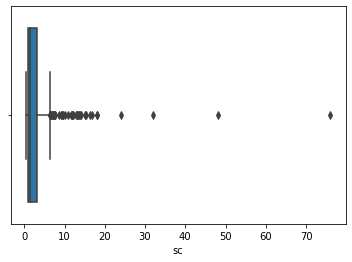

In [315]:
sns.boxplot(df['sc'])

In [316]:
outlier_sod=detect_outliers(df['sod'])
outlier_sod

[4.5]

C:\Users\AAAAA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sod'>

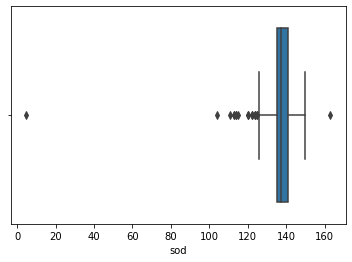

In [317]:
sns.boxplot(df['sod'])

In [318]:
outlier_pot=detect_outliers(df['pot'])
outlier_pot

[39.0, 47.0]

C:\Users\AAAAA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pot'>

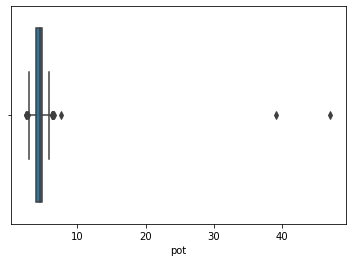

In [319]:
sns.boxplot(df['pot'])

In [320]:
outlier_hemo=detect_outliers(df['hemo'])
outlier_hemo

[]

In [321]:
outlier_pcv=detect_outliers(df['pcv'])
outlier_pcv

[]

In [322]:
outlier_sc=detect_outliers(df['sc'])
outlier_sc

[76.0, 32.0, 48.1]

C:\Users\AAAAA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sc'>

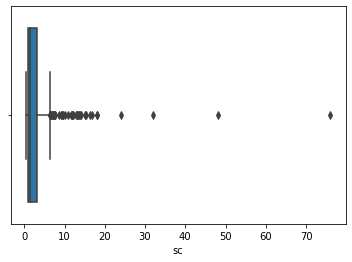

In [323]:
sns.boxplot(df['sc'])

In [324]:
outlier_wbcc=detect_outliers(df['wbcc'])
outlier_wbcc

[18900.0, 21600.0, 19100.0, 26400.0]

C:\Users\AAAAA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wbcc'>

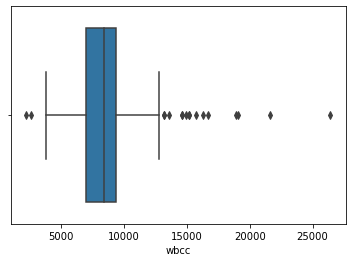

In [325]:
sns.boxplot(df['wbcc'])

In [326]:
outlier_rbcc=detect_outliers(df['rbcc'])
outlier_rbcc

[]

C:\Users\AAAAA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rbcc'>

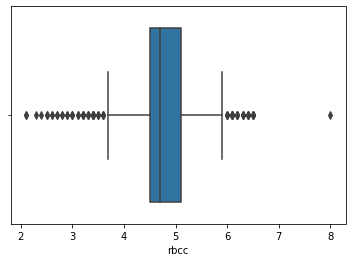

In [327]:
sns.boxplot(df['rbcc'])

In [328]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.0,0.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1.0,1.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2.0,0.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.0,2.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,3.0,0.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33.0,0.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,140.000000,...,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0
396,15.0,2.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,75.000000,...,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0
397,45.0,0.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,100.000000,...,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0
398,44.0,6.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,114.000000,...,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0


# feature selection

[1.06170068e-03 6.06455304e-04 5.32847216e-02 5.86528620e-02
 4.63423557e-03 5.60084236e-02 2.20715721e-02 3.14066262e-03
 6.04999071e-04 5.89215641e-03 3.29405176e-03 1.39109013e-03
 1.68151208e-03 1.44811566e-03 5.46969763e-02 4.03748498e-02
 4.60734264e-04 1.98455209e-02 7.04589357e-02 6.58126272e-02
 1.31011494e-04 1.85954208e-02 1.06984706e-02 2.60081094e-03
 5.02552084e-01]


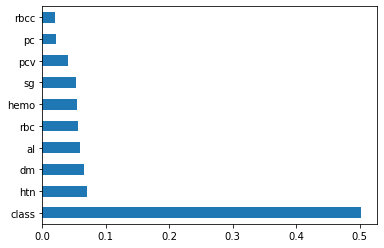

In [329]:
#
X = df.iloc[:,0:29]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [330]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:25]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

    Specs         Score
16   wbcc  12733.744679
9     bgr   2428.303583
10     bu   2336.007159
0     age    409.599913
11     sc    354.405935
15    pcv    324.639089
3      al    228.067797
24  class    150.000000
14   hemo    125.101692
4      su    100.951947
18    htn     86.295156
19     dm     79.541441
22     pe     42.576910
23    ane     35.610627
12    sod     28.796605


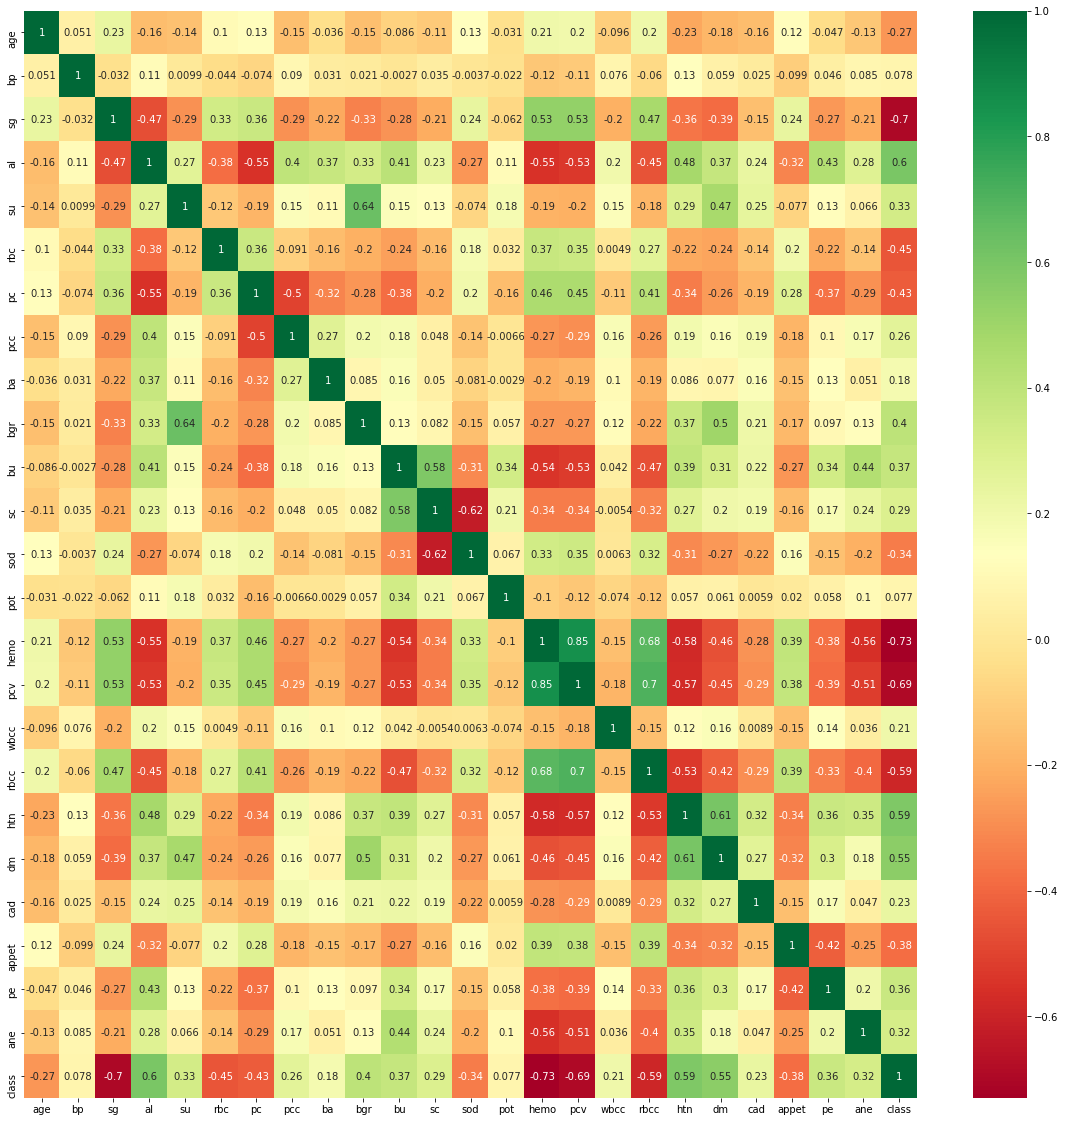

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<p style="font-family: Arial; font-size:1.5em;color:red; font-style:bold"><br>
Recursive Feature Elimination :RFE</p><br>


In [332]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [333]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='linear', C=1, random_state=25)
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([0.9625, 0.975 , 0.9625, 1.    , 0.975 ])

In [334]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(df   , X_train , y_train , scoring='neg_mean_squared_error' 
                       , cv=5)   
mean(scores) # negMSE (higher=better), adj hyper params to optimize 
df.fit(x_train, y_train)      # make sure to fit the model again after 
y_final_test_pred = df.predict(x_test) # Final predictions
mean_squared_error(y_test, y_final_test_pred) # Final MSE on 'new' data

TypeError: estimator should be an estimator implementing 'fit' method,       age   bp     sg   al   su       rbc   pc  pcc   ba         bgr  ...  \
0     0.0  0.0  1.020  1.0  0.0  0.810484  1.0  0.0  0.0  121.000000  ...   
1     1.0  1.0  1.020  4.0  0.0  0.810484  1.0  0.0  0.0  148.036517  ...   
2     2.0  0.0  1.010  2.0  3.0  1.000000  1.0  0.0  0.0  423.000000  ...   
3     0.0  2.0  1.005  4.0  0.0  1.000000  0.0  1.0  0.0  117.000000  ...   
4     3.0  0.0  1.010  2.0  0.0  1.000000  1.0  0.0  0.0  106.000000  ...   
..    ...  ...    ...  ...  ...       ...  ...  ...  ...         ...  ...   
395  33.0  0.0  1.020  0.0  0.0  1.000000  1.0  0.0  0.0  140.000000  ...   
396  15.0  2.0  1.025  0.0  0.0  1.000000  1.0  0.0  0.0   75.000000  ...   
397  45.0  0.0  1.020  0.0  0.0  1.000000  1.0  0.0  0.0  100.000000  ...   
398  44.0  6.0  1.025  0.0  0.0  1.000000  1.0  0.0  0.0  114.000000  ...   
399  41.0  0.0  1.025  0.0  0.0  1.000000  1.0  0.0  0.0  131.000000  ...   

      pcv    wbcc      rbcc  htn   dm  cad  appet   pe  ane  class  
0    44.0  7800.0  5.200000  1.0  1.0  0.0    1.0  0.0  0.0      1  
1    38.0  6000.0  4.707435  0.0  0.0  0.0    1.0  0.0  0.0      1  
2    31.0  7500.0  4.707435  0.0  1.0  0.0    0.0  0.0  1.0      1  
3    32.0  6700.0  3.900000  1.0  0.0  0.0    0.0  1.0  1.0      1  
4    35.0  7300.0  4.600000  0.0  0.0  0.0    1.0  0.0  0.0      1  
..    ...     ...       ...  ...  ...  ...    ...  ...  ...    ...  
395  47.0  6700.0  4.900000  0.0  0.0  0.0    1.0  0.0  0.0      0  
396  54.0  7800.0  6.200000  0.0  0.0  0.0    1.0  0.0  0.0      0  
397  49.0  6600.0  5.400000  0.0  0.0  0.0    1.0  0.0  0.0      0  
398  51.0  7200.0  5.900000  0.0  0.0  0.0    1.0  0.0  0.0      0  
399  53.0  6800.0  6.100000  0.0  0.0  0.0    1.0  0.0  0.0      0  

[400 rows x 25 columns] was passed

In [ ]:
X=df.drop (columns=['class'],axis=1)
Y=df['class']

In [ ]:
rfe= RFE(estimator =DecisionTreeClassifier() , n_features_to_select=12)
rfe.fit(X,Y)

In [ ]:
for i ,col in zip(range(X.shape[1]),X.columns):
    print(f"{col} selected ={rfe.support_[i]} rank={rfe.ranking_[i]}")

<p style="font-family: Arial; font-size:1.5em;color:red; font-style:bold"><br>
Correlation-based Feature Selection : CFS </p><br>

In [ ]:
df


In [ ]:
import numpy as np

# name of the label (can be seen in the dataframe)
label = 'class'

# list with feature names (V1, V2, V3, ...)
features = df.columns.tolist()
features

In [ ]:
features.remove(label)

In [ ]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df[label], df[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [ ]:
subset = ['age','bp','sg','al']
corr = df[subset].corr()
corr

In [ ]:
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

In [ ]:
best_value = -1
best_feature = ''
for feature in features:
    coeff = pointbiserialr( df[label], df[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))


In [ ]:
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

In [ ]:
# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

In [ ]:
# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 5

In [ ]:
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, label)
            # and push it to the queue
            queue.push(temp_subset, merit)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
import time

# predictors
X = df[features].to_numpy()
# target
Y = df[label].to_numpy()

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores = cross_val_score(svc, X, Y, cv=10)
best_score = np.mean( scores )

print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

# Output
# Score: 50.00% (Time: 40.1259 s)

In [ ]:
# predictors
X = df[best_subset].to_numpy()

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores_subset = cross_val_score(svc, X, Y, cv=10)
best_score = np.mean( scores_subset )

print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

# Output
# Score: 66.50% (Time: 5.8936 s)

# feature scaling : Standardization

In [ ]:
df.info()

In [241]:
#using Standardization to makes all variables equally contribute to the analysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['age']=scaler.fit_transform(df.age.values.reshape(-1, 1))
df['bp']=scaler.fit_transform(df.bp.values.reshape(-1, 1))
df['al']=scaler.fit_transform(df.al.values.reshape(-1, 1))
df['sg']=scaler.fit_transform(df.sg.values.reshape(-1, 1))
df['bgr']=scaler.fit_transform(df.bgr.values.reshape(-1, 1))
df['pcv']=scaler.fit_transform(df.pcv.values.reshape(-1, 1))
df['wbcc']=scaler.fit_transform(df.wbcc.values.reshape(-1, 1))
df['rbcc']=scaler.fit_transform(df.rbcc.values.reshape(-1, 1))

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-1.449711,-1.152296,0.483355,-0.013338,0.0,0.810484,1.0,0.0,0.0,-0.361987,...,0.628372,-0.240519,5.869017e-01,1.0,1.0,0.0,1.0,0.0,0.0,1
1,-1.399326,-0.706964,0.483355,2.347516,0.0,0.810484,1.0,0.0,0.0,0.000000,...,-0.108649,-0.954786,1.058283e-15,0.0,0.0,0.0,1.0,0.0,0.0,1
2,-1.348940,-1.152296,-1.381391,0.773613,3.0,1.000000,1.0,0.0,0.0,3.681441,...,-0.968506,-0.359563,1.058283e-15,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.449711,-0.261632,-2.313764,2.347516,0.0,1.000000,0.0,1.0,0.0,-0.415543,...,-0.845669,-0.677016,-9.620759e-01,1.0,0.0,0.0,0.0,1.0,1.0,1
4,-1.298555,-1.152296,-1.381391,0.773613,0.0,1.000000,1.0,0.0,0.0,-0.562820,...,-0.477159,-0.438926,-1.280110e-01,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.213004,-1.152296,0.483355,-0.800290,0.0,1.000000,1.0,0.0,0.0,-0.107600,...,0.996882,-0.677016,2.294454e-01,0.0,0.0,0.0,1.0,0.0,0.0,0
396,-0.693932,-0.261632,1.415727,-0.800290,0.0,1.000000,1.0,0.0,0.0,-0.977874,...,1.856739,-0.240519,1.778423e+00,0.0,0.0,0.0,1.0,0.0,0.0,0
397,0.817627,-1.152296,0.483355,-0.800290,0.0,1.000000,1.0,0.0,0.0,-0.643153,...,1.242555,-0.716697,8.252060e-01,0.0,0.0,0.0,1.0,0.0,0.0,0
398,0.767242,1.519695,1.415727,-0.800290,0.0,1.000000,1.0,0.0,0.0,-0.455709,...,1.488229,-0.478608,1.420967e+00,0.0,0.0,0.0,1.0,0.0,0.0,0


In [189]:
########################random forest
df["class"].value_counts()

1    250
0    150
Name: class, dtype: int64

C:\Users\AAAAA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


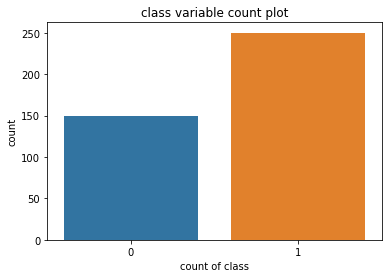

In [190]:
sns.countplot(df["class"])
plt.xlabel("class")
plt.xlabel("count of class")
plt.title("class variable count plot")
plt.show()

In [191]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [194]:
X.shape


(400, 24)

In [195]:
Y.shape

(400,)

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=99)

In [356]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train, y_train)


RandomForestClassifier()

In [372]:
RandomForestClassifier
(criterion='gini',
                             max_depth = 8,
                             min_sample_split = 10,
                             random_state = 5)

SyntaxError: invalid syntax (<ipython-input-372-69a027c9e077>, line 2)

In [367]:
clf1.feature_importances_

array([6.18090935e-03, 4.01458765e-03, 1.36061097e-01, 6.66791068e-02,
       6.57662359e-03, 7.31107705e-02, 1.19119358e-02, 3.55788152e-04,
       2.23794736e-04, 3.28222706e-02, 2.63796461e-02, 1.20094001e-01,
       2.37463527e-02, 6.09259866e-03, 1.95532094e-01, 1.29762654e-01,
       7.29614241e-03, 7.89526408e-02, 4.58297748e-02, 1.79445772e-02,
       5.03241450e-07, 5.43930297e-03, 3.24359134e-03, 1.74923621e-03])

In [371]:
#df.columns

In [369]:
y_pred = clf1.predict( X_test )

In [370]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [373]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[41,  0],
       [ 0, 59]], dtype=int64)

In [374]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [379]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf1, X_train, y_train, cv=5)  #te7seb R^2

array([1.        , 0.98333333, 1.        , 0.96666667, 1.        ])

In [380]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        59

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



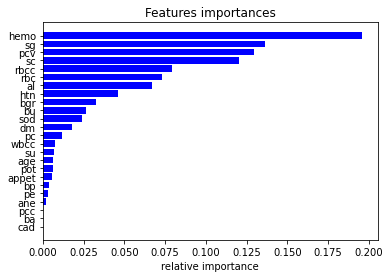

In [382]:
features = df.columns
importances = clf1.feature_importances_
indices = np.argsort(importances)

plt.title("Features importances")
plt.barh(range(len(indices)),importances[indices],color='b')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("relative importance")
plt.show()